In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import networkx as nx
import numpy as np
import pandas as pd

import msg_passing
import utils
import run
import display

In [28]:
hist, diagnostic_hist, g = run.test2()

def load_stuff():
    fname = "output/100K_lr_3_dim_3"
    g = msg_passing.load_graph_graphml(fname + ".graphml")
    hist, diagnostic_hist = msg_passing.load_history(fname + ".pkl")
    return hist, diagnostic_hist, g

#hist, diagnostic_hist, g = load_stuff()

iteration 0: update mag: 0.22446405347644258 loss: 0.048076668244304024
iteration 100: update mag: 0.19937685404359404 loss: 0.10497875120122481
iteration 200: update mag: 0.17265623103394215 loss: 0.1575210306968116
iteration 300: update mag: 0.16082939526046727 loss: 0.19591308456354053
iteration 400: update mag: 0.1196564271346113 loss: 0.23047302181182064
iteration 500: update mag: 0.11074538501474042 loss: 0.19439576832496971
iteration 600: update mag: 0.0940754725762809 loss: 0.17184175334174892
iteration 700: update mag: 0.0699383021336646 loss: 0.16042300611770582
iteration 800: update mag: 0.04549987175804302 loss: 0.16852994787170175
iteration 900: update mag: 0.027861695688150574 loss: 0.1470031890076902
iteration 999: update mag: 0.005093101510038337 loss: 0.12543123277313026


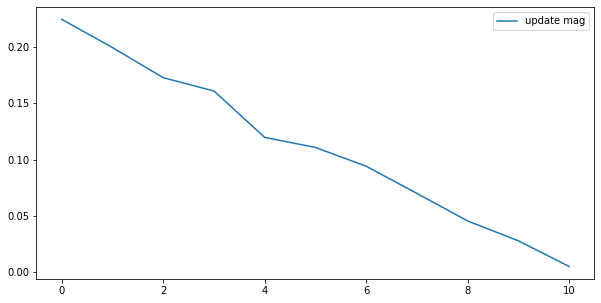

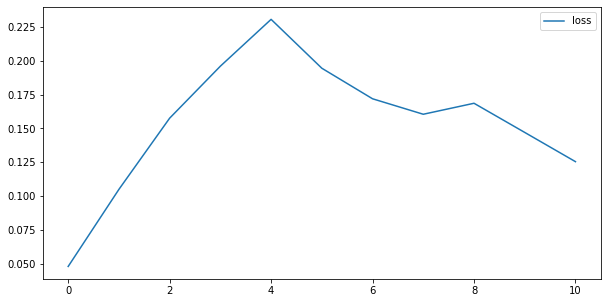

In [29]:
display.plot_diagnostic(diagnostic_hist)

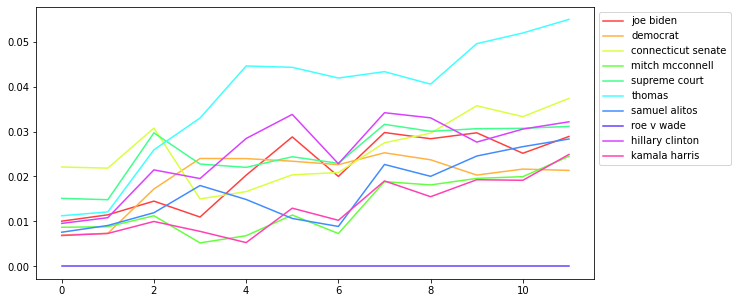

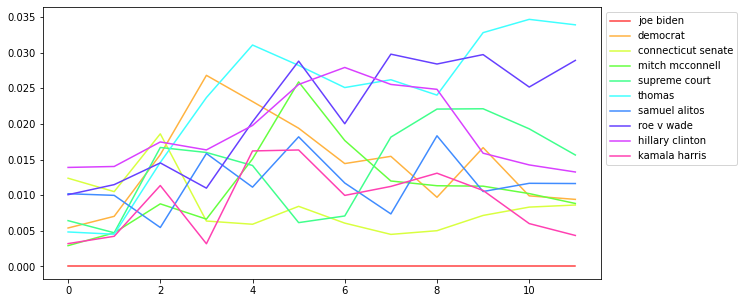

In [30]:
#display.plot_history(hist)
display.plot_history(hist, target="roe v wade")
display.plot_history(hist, target="joe biden")

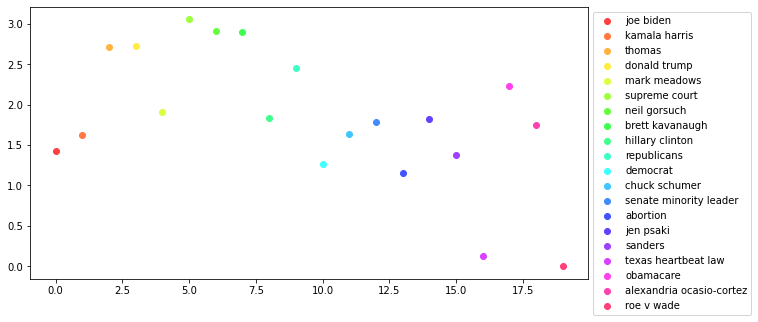

In [24]:
ppl = [
    "joe biden",
    "kamala harris",
    "thomas",
    "donald trump",
    "mark meadows",
    "supreme court",
    "neil gorsuch",
    "brett kavanaugh",
    "hillary clinton",
    "republicans",
    "democrat",
    "chuck schumer",
    "senate minority leader",
    "abortion",
    "jen psaki",
    "sanders",
    "texas heartbeat law",
    "obamacare",
    "alexandria ocasio-cortez",
    "roe v wade"
]
target = "roe v wade"
display.plot_final_values(g, ppl, target=target)

In [106]:
msg_passing.save_graph(g, "output/5K_lr_2_dim_10.graphml")
msg_passing.save_history(hist, diagnostic_hist, "output/5K_lr_2_dim_10.pkl")

In [22]:
fname = "input/Streamed_Datasets/gun_regulations_network.csv"
fname = "input/Streamed_Datasets/war_in_ukraine_network.csv"
df = pd.read_csv("input/Streamed_Datasets/gun_regulations_network.csv")
dates = list(set(df["publish_date"].fillna("")))
dates = sorted(dates)
print(len(dates))
print(dates)
g = msg_passing.load_graph_csv(fname, with_dates=True)
#print(utils.node_degrees(g))

211
['', '2017-10-05 00:00:00', '2018-03-01 07:00:47-04:00', '2020-01-18 09:00:39-05:00', '2022-07-01 00:00:00', '2022-07-02 00:00:00', '2022-07-03 00:00:00', '2022-07-04 00:00:00', '2022-07-04 13:08:19+00:00', '2022-07-05 00:00:00', '2022-07-05 05:01:31-05:00', '2022-07-06 00:00:00', '2022-07-06 03:19:02+00:00', '2022-07-06 11:54:59', '2022-07-06 17:22:00+00:00', '2022-07-06 18:33:01-07:00', '2022-07-07 00:00:00', '2022-07-07 04:01:00+00:00', '2022-07-07 13:53:28+00:00', '2022-07-07 16:13:22+00:00', '2022-07-07 16:28:00', '2022-07-07 17:34:23+00:00', '2022-07-07 18:48:41.205000+00:00', '2022-07-08 00:00:00', '2022-07-08 05:30:00', '2022-07-08 10:39:00', '2022-07-08 19:32:47+00:00', '2022-07-09 00:00:00', '2022-07-10 00:00:00', '2022-07-11 00:00:00', '2022-07-11 04:36:17', '2022-07-12 00:00:00', '2022-07-12 20:30:36+00:00', '2022-07-13 00:00:00', '2022-07-13 02:40:13-04:00', '2022-07-13 16:00:00', '2022-07-14 00:00:00', '2022-07-14 11:04:00', '2022-07-14 12:04:00', '2022-07-14 15:08:25

In [51]:
dates, results = run.test3()
print()

Training on dates before 2017-10-05 00:00:00, graph 1/20
Training on dates before 2018-01-08 12:37:53.684210526, graph 2/20
Training on dates before 2018-04-14 01:15:47.368421052, graph 3/20
Training on dates before 2018-07-18 13:53:41.052631576, graph 4/20
Training on dates before 2018-10-22 02:31:34.736842104, graph 5/20
Training on dates before 2019-01-25 15:09:28.421052632, graph 6/20
Training on dates before 2019-05-01 03:47:22.105263152, graph 7/20
Training on dates before 2019-08-04 16:25:15.789473680, graph 8/20
Training on dates before 2019-11-08 05:03:09.473684208, graph 9/20
Training on dates before 2020-02-11 17:41:03.157894736, graph 10/20
Training on dates before 2020-05-17 06:18:56.842105264, graph 11/20
Training on dates before 2020-08-20 18:56:50.526315792, graph 12/20
Training on dates before 2020-11-24 07:34:44.210526304, graph 13/20
Training on dates before 2021-02-27 20:12:37.894736832, graph 14/20
Training on dates before 2021-06-03 08:50:31.578947360, graph 15/20

20


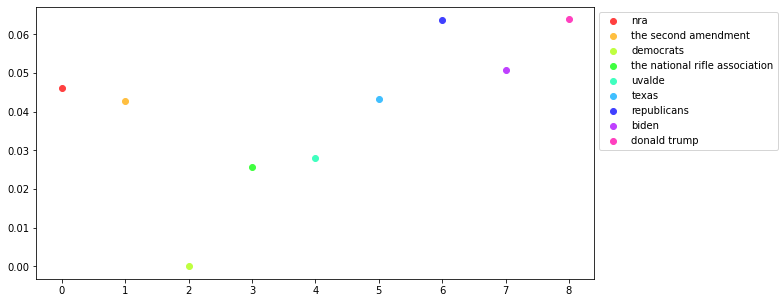

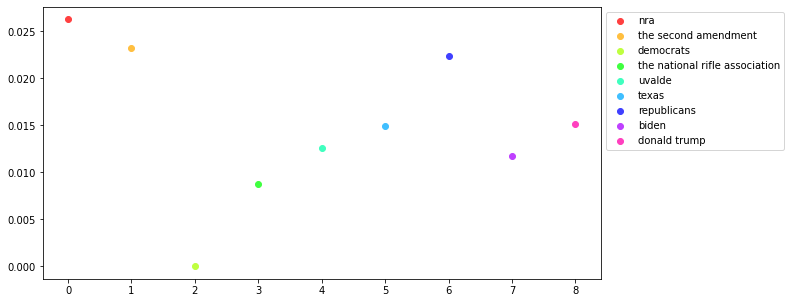

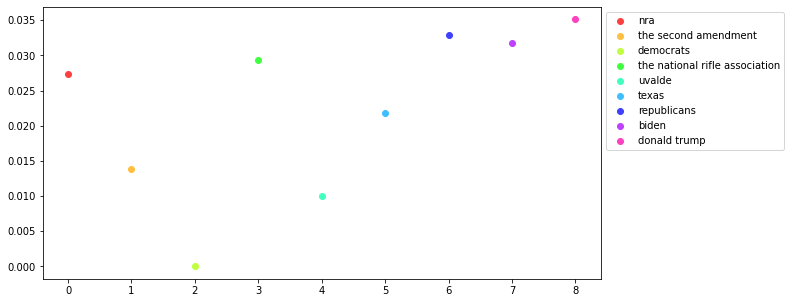

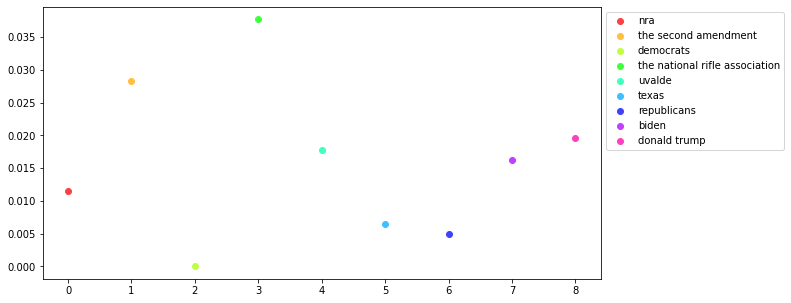

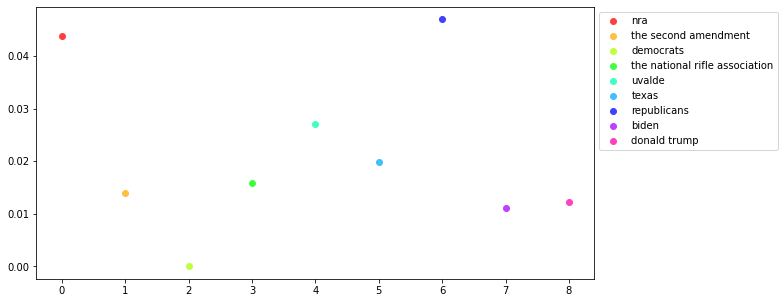

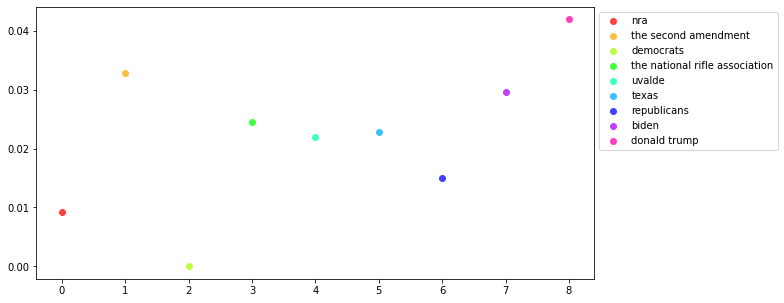

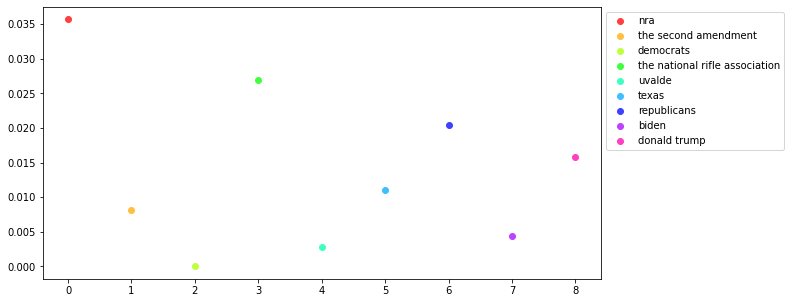

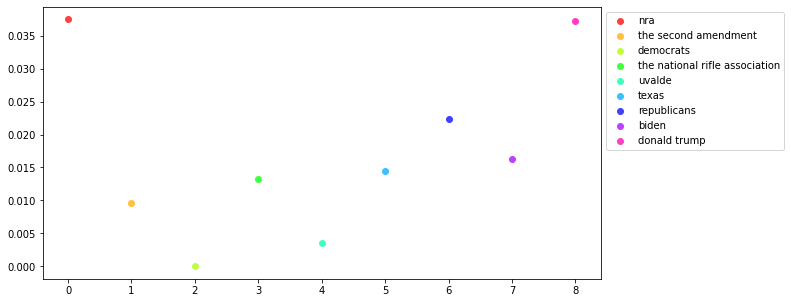

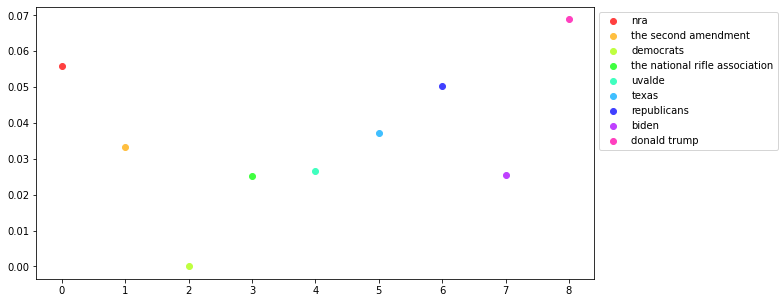

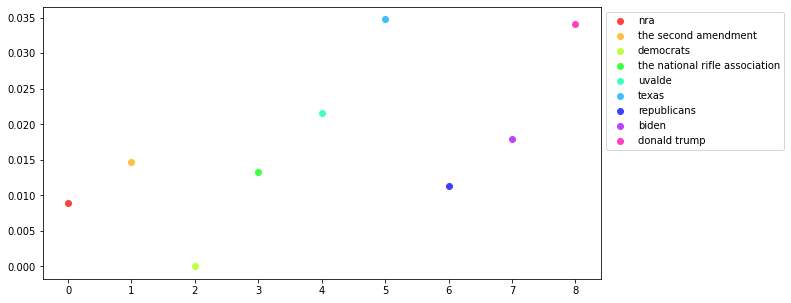

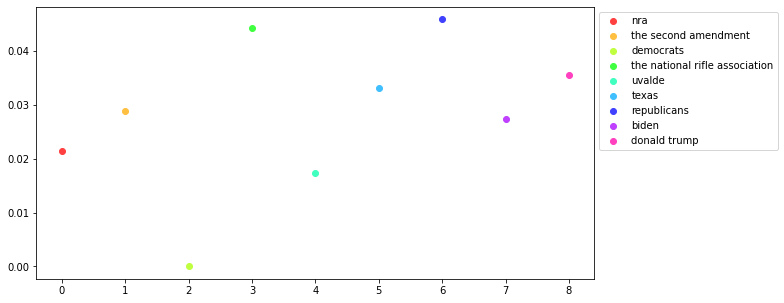

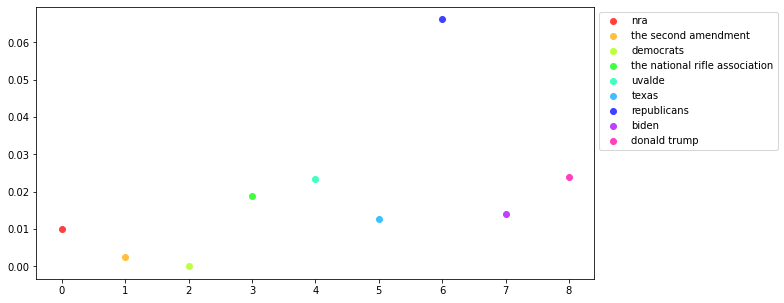

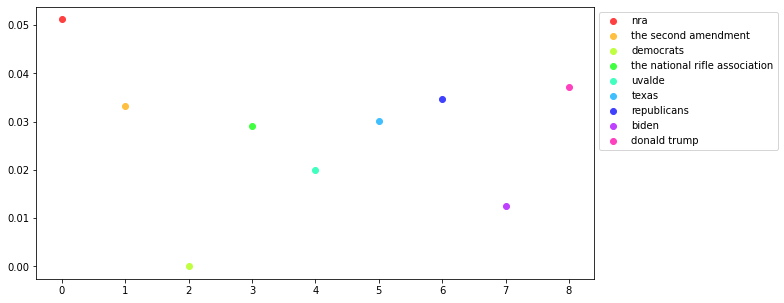

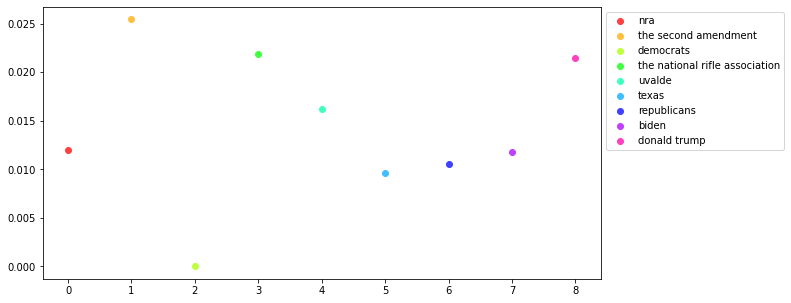

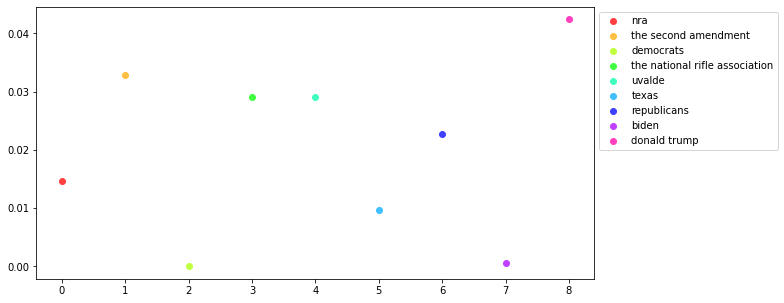

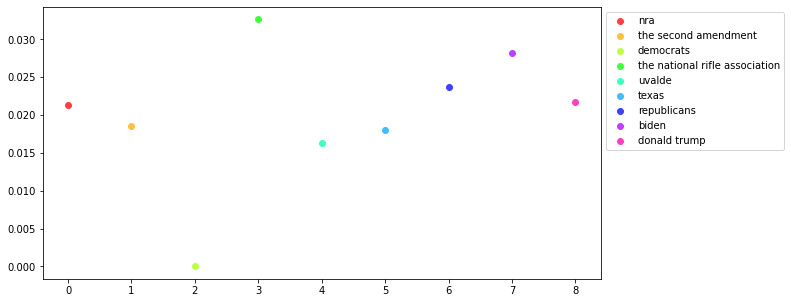

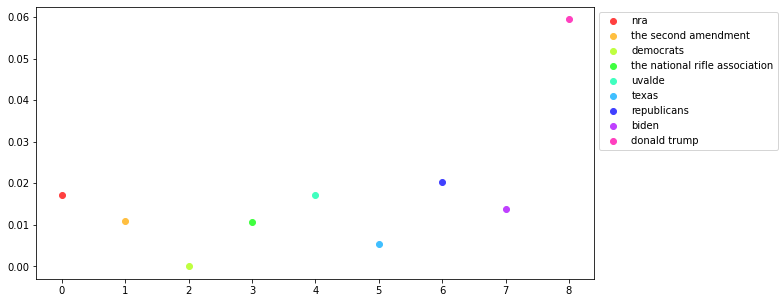

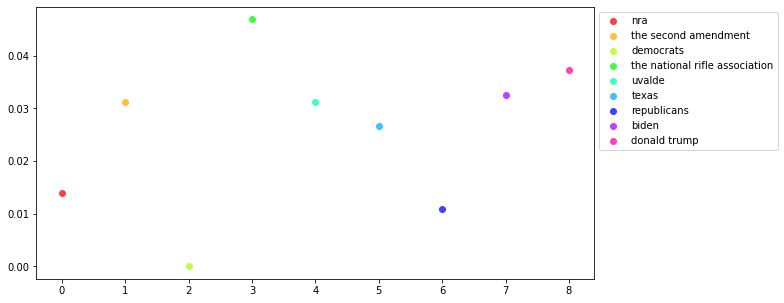

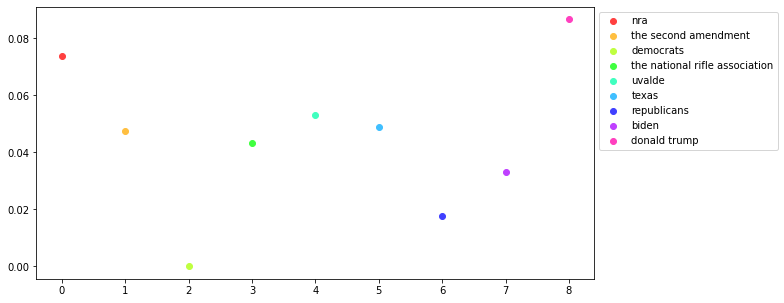

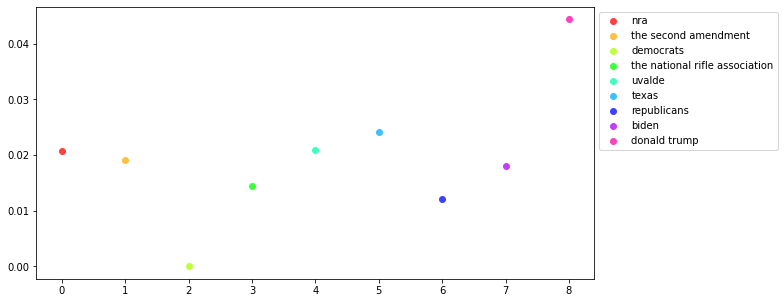

In [47]:
print(len(results))
nodes = [
    "nra",
    "the second amendment",
    "democrats",
    "the national rifle association",
    "uvalde",
    "texas", 
    "republicans",
    "biden",
    "donald trump",
]
for g, h, d in results:
    #display.plot_diagnostic(d)
    target = "democrats"
    display.plot_final_values(g, nodes, target=target)